<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Ознакомление-с--данными" data-toc-modified-id="Ознакомление-с--данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ознакомление с  данными</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-элементов-на-каждом-этапе" data-toc-modified-id="Изменение-концентрации-элементов-на-каждом-этапе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации элементов на каждом этапе</a></span></li><li><span><a href="#Распределения-размеров-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарные-концентрации" data-toc-modified-id="Исследуем-суммарные-концентрации-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарные концентрации</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишим-функции-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишим-функции-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишим функции для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Cлучайный-лес" data-toc-modified-id="Cлучайный-лес-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Cлучайный лес</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Ознакомление с  данными

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
try:
    df_train = pd.read_csv('D:\\Мои документы\\DS\\gold_industry_train.csv')
    df_test = pd.read_csv('D:\\Мои документы\\DS\\gold_industry_test.csv')
    df = pd.read_csv('D:\\Мои документы\\DS\\gold_industry_full.csv')
except:
    df_train = pd.read_csv('/datasets/gold_industry_train.csv')
    df_test = pd.read_csv('/datasets/gold_industry_test.csv')
    df = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
pd.options.display.max_columns = None
display(df_train.head(),df_test.head(), df.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [4]:
display(df_train.info(),df_test.info(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

None

None

**Описание данных**

**Технологический процесс**
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков**

**Наименование признаков должно быть такое:**
``[этап].[тип_параметра].[название_параметра]``

**Пример:**
``rougher.input.feed_ag``

**Возможные значения для блока [этап]:**
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

**Возможные значения для блока [тип_параметра]:**
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

Исходные данные ``df`` и обучающая выборка ``df_train`` содержат 87 столбцов, тестовая выборка ``df_test`` - 53 столбца.

In [5]:
df_list=[df, df_train, df_test]
df_list_name = ['"Исходные данные"', '"Обучающая выборка"', '"Тестовая выборка"']

In [6]:
for i,j in zip(df_list,df_list_name):
    print('Количество пропущеных данных в солбцах датасета',j)
    print(i.isna().sum()[i.isna().sum() > 0].to_string())
    print()  

Количество пропущеных данных в солбцах датасета "Исходные данные"
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
rougher.input.feed_rate                                 11
rougher.input.feed_size                                145
rougher.input.floatbank10_sulfate                       34
rougher.input.floatbank10_xanthate                       8
rougher.state.floatbank10_a_air                          1
rougher.state.floatbank10_a_level                        1
rougher.state.floatbank10_b_air                          1
rougher.state.floatbank10_b_level                        1
rougher.state.floatbank10_c_air                          1
rougher.state.floatbank10_c_level                        1
rougher.state.floatbank10_e_air                        436
rougher.input.floatbank11_sulfate                       44
rougher.input.floatbank11_xanthate                     453
rougher.calculation.sulfate_to_au_concentrate    

In [7]:
for i,j in zip(df_list,df_list_name):
    print(f'Дубликатов в датасете {j} - {i.duplicated().sum()}')

Дубликатов в датасете "Исходные данные" - 0
Дубликатов в датасете "Обучающая выборка" - 0
Дубликатов в датасете "Тестовая выборка" - 0


**Вывод**

- Исходный датасет df содежит 19439 строк и 87 столбцов. Размер обучающей выборки df_train - (14149, 87). В тестовой выборке df_test отсутствуют 34 столбца с данными и ее размер - (5290, 53).
- Типы данных - float64 для всех столбцов, кроме date - типа object.
- В каждой выборке имеются пропущенные значения.
- Полных дубликатов в данных не обнаружено.

### Проверка расчета эффективности обогащения

Эффективность обогащения рассчитывается по формуле

``Recovery = (C * (F - T)) / (F * (C - T)) * 100``

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

In [8]:
def recovery(C, F, T, true_recovery):
    
    calc = pd.Series((C * (F - T)) / (F * (C - T)) * 100)  
    
    mae = mean_absolute_error(true_recovery, calc) 
    
    
    return print('Средняя абсолютная ошибка равна', mae)

In [9]:
recovery(C=df_train['rougher.output.concentrate_au'], 
         F=df_train['rougher.input.feed_au'], 
         T=df_train['rougher.output.tail_au'],
        true_recovery=df_train['rougher.output.recovery'])

Средняя абсолютная ошибка равна 9.83758577644259e-15


**Вывод**

Средняя абсолютная ошибка  составила 9.83758577644259e-15
Ошибка близка к 0, это значит, что эффективность обогащения ``rougher.output.recovery`` в обучающей выборке рассчитана верно.

**Проанализируем признаки, недоступные в тестовой выборке.**

In [10]:
columns=list(set(df.columns)-set(df_test.columns))

df[columns].reindex(sorted(df[columns].columns), axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_au                         19439 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_au                                19439 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


В тестовой выборке отсутсвуют 34 параметра и целевые признаки. Все параметры имееют тип данных ``float``

Наименование признаков:

- ``final.output`` финальные характеристики параметра продукта 
- ``primary_cleaner.output`` первичная очистка параметра продукта 
- ``rougher.calculation``  флотация расчётные характеристики
- ``rougher.output`` флотация параметра продукта 
- ``secondary_cleaner.output`` вторичная очистка параметра продукта 
- ``final.output.recovery`` Эффективность обогащения

В тестовой выборке отсутствуют два целевых признака - ``final.output.recovery``, ``rougher.output.recovery``. Их необходимо найти из данных по дате и добавить.
Некоторые признаки могут быть недоступны в test, потому что они не могут быть измерены в реальном времени в процессе работы модели. Признаки с маркировкой output- это признаки, которые получают после обработки сырья на каждом этапе, до обработки и прохождения очередного этапа они нам не известны
Из обучающей выборки необходимо удалить остальные столбцы, которые отсуствуют в тестовой выборке.

### Предобработка данных

**Дополним тестовую выборку целевыми признаками**

In [11]:
print('Размер тестовой выборки до добавления целевых признаков', df_test.shape)

Размер тестовой выборки до добавления целевых признаков (4860, 53)


In [12]:
df_test = df_test.merge(df[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')

In [13]:
print('Размер тестовой выборки до добавления целевых признаков', df_test.shape)

Размер тестовой выборки до добавления целевых признаков (4860, 55)


**Удалим в обучающей выборке признаки которых нет в тестовой выборке** 

In [14]:
print('Размер обучающей выборки до удаления признаков', df_train.shape)

Размер обучающей выборки до удаления признаков (14579, 87)


In [15]:
# удалим целевые признаки из списка отсутсвующих признаков в тестовой выборке
columns.remove('rougher.output.recovery') 
columns.remove('final.output.recovery')

In [16]:
df_train = df_train.drop(columns, axis=1)

In [17]:
print('Размер обучающей выборки до удаления признаков', df_train.shape)

Размер обучающей выборки до удаления признаков (14579, 55)


**Заполним пропуски**

Т.К. данные индексируются датой и временем получения информации они распределены по времени. Значит, стоит заполнить пропуски значением из прошлой строки.

In [18]:
column_nan= list(df.columns[df.isnull().any()]) # Находим столбцы с пустыми значениями

In [19]:
print('Количество стобцов с пропусками:',len(column_nan))

Количество стобцов с пропусками: 63


In [20]:
pd.set_option('display.max_rows', None)
df[column_nan].describe().T

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_pb,19339.0,3.598085,1.049486,1.000000e-02,2.887280,3.534895,4.244161,7.142594e+00
rougher.input.feed_sol,19340.0,36.695114,5.145445,1.000000e-02,34.207799,37.202650,40.039133,5.347774e+01
rougher.input.feed_rate,19428.0,478.320042,105.373758,2.985849e-03,416.525453,499.416120,550.172183,7.175088e+02
rougher.input.feed_size,19294.0,58.970310,21.634478,4.636880e-02,47.435103,54.610197,65.023044,4.849675e+02
rougher.input.floatbank10_sulfate,19405.0,12.334373,3.427317,1.083112e-03,10.000362,12.001174,14.716595,3.611827e+01
rougher.input.floatbank10_xanthate,19431.0,6.021474,1.127263,5.682328e-04,5.398678,6.008273,6.798051,9.703448e+00
rougher.state.floatbank10_a_air,19438.0,1105.315068,160.826798,-4.206929e-02,999.661867,1001.072890,1205.620588,1.521980e+03
rougher.state.floatbank10_a_level,19438.0,-376.610690,93.909667,-6.579498e+02,-499.835165,-300.263994,-299.981998,-2.737761e+02
rougher.state.floatbank10_b_air,19438.0,1320.221139,176.287095,-7.218064e-01,1199.626115,1301.579988,1448.630789,1.809194e+03
rougher.state.floatbank10_b_level,19438.0,-467.247826,54.673142,-6.502600e+02,-500.201130,-499.784045,-400.615589,-2.963831e+02


In [21]:
for i in [df, df_train, df_test]:
    i.fillna(method='ffill', inplace=True)

проверим, не осталось ли пропусков

In [22]:
display(df.isna().sum()[df.isna().sum() > 0], df_train.isna().sum()[df_train.isna().sum() > 0],df_test.isna().sum()[df_test.isna().sum() > 0])


Series([], dtype: int64)

Series([], dtype: int64)

Series([], dtype: int64)

**Вывод**
- Эффективность обогащения rougher.output.recovery в обучающей выборке рассчитана верно.
- Обучающая и тестовая выборка предобработаны. Количество столбцов составило 55.
- Заполнены все пропуски в во всех таблицах.

## Анализ данных

### Изменение концентрации элементов на каждом этапе

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? 

In [23]:
metal=['au', 'ag', 'pb'] #металл

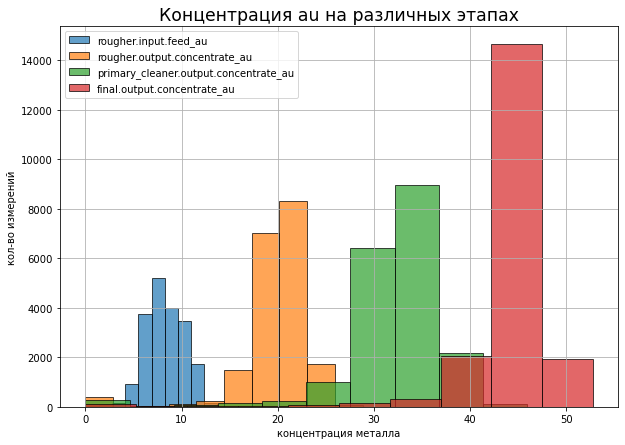

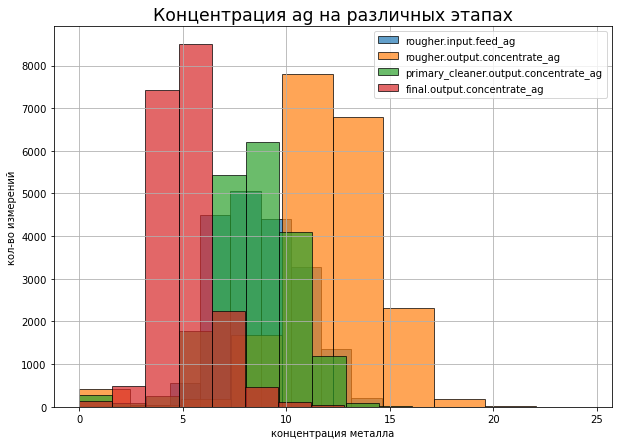

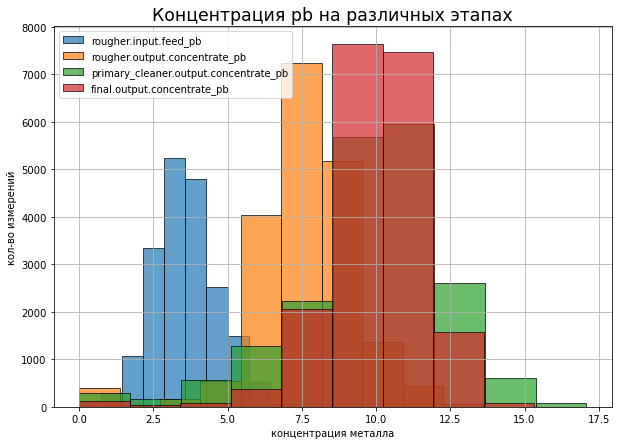

In [24]:
# создаём цикл для вывода необходимых графиков
for met in metal:
    plt.figure(figsize=(10,7))
    legend=[]
    for col in df.columns:
        if ('concentrate_'+met) in col or  ('rougher.input.feed_'+ met) in col:
            df[col].hist(alpha=0.7, edgecolor='k')
            legend.append(col)
    plt.title(f'Концентрация {met} на различных этапах', fontsize='xx-large')
    plt.legend(legend)
    plt.xlabel("концентрация металла")
    plt.ylabel("кол-во измерений")
    plt.show();

**Просмотрев графики можно сделать вывод:**

- Концентрация золота постепенно увеличивается с каждым этапом очистки
- Концентрация серебра уменьшается
- Концентрация свинца практически остается на одинаковом уровне.


На всех этапах обработки имеются нулевые значения концентрации. Для всех признаков - это аномальные значения (выбросы).

Так как нулевые значения в концентрациях могут повлиять на модель машинного обучения, удалим такие строки.

In [25]:
index_clean=[]
for met in metal:    
    for col in df.columns:
        if ('concentrate_'+met) in col:
            for i in range(len(df)-1):
                if df[col][i] == 0:
                    index_clean.append(df['date'][i])

In [26]:
df=df.drop(df[df['date'].isin(index_clean)].index, axis=0)
df_train=df_train.drop(df_train[df_train['date'].isin(index_clean)].index, axis=0)
df_test=df_test.drop(df_test[df_test['date'].isin(index_clean)].index, axis=0)

In [27]:
print('размер данных:',df.shape)
print('размер обучающей выборки:',df_train.shape)
print('размер тестовой выборки:',df_test.shape)

размер данных: (18842, 87)
размер обучающей выборки: (13982, 55)
размер тестовой выборки: (4860, 55)


### Распределения размеров гранул на обучающей и тестовой выборках

In [28]:
name=[]
for col in df_train.columns:
    if ('feed_size') in col:       
        name.append(col)

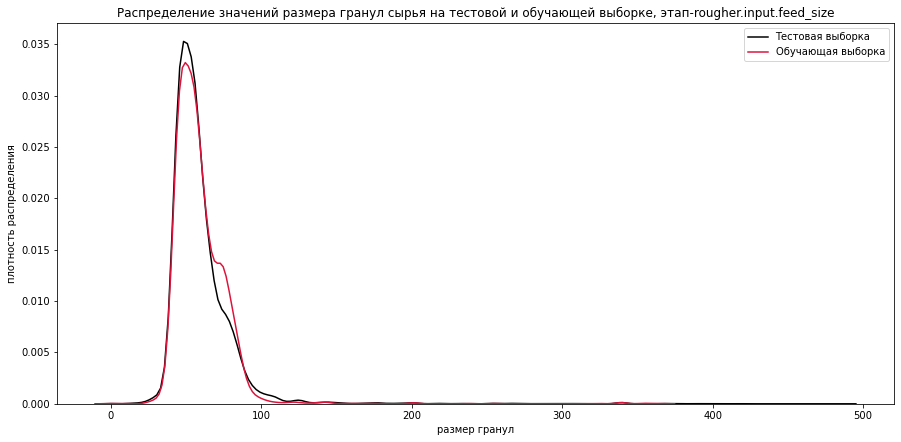

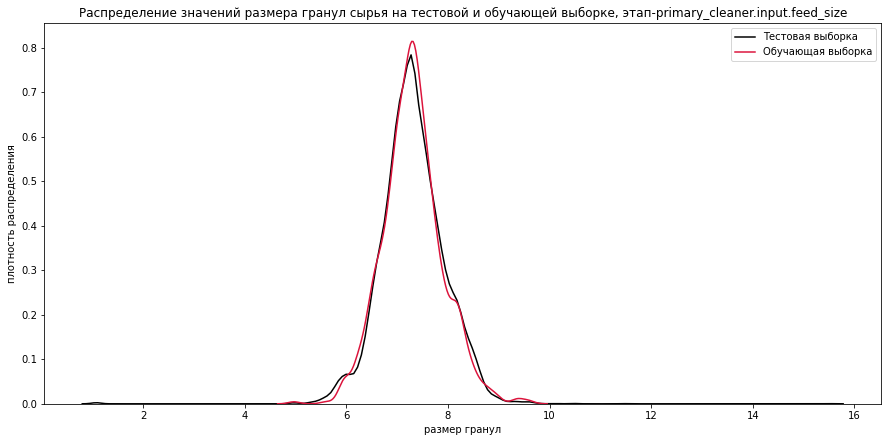

In [29]:
for i in name:
    plt.figure(figsize = (15,7))
    ax = sns.kdeplot(df_train[i],                     
                      alpha=0.7)
    ax.lines[0].set_color('black')
    
    ax = sns.kdeplot(df_test[i],
                      color='green',                   
                      alpha=0.7)
    
    ax.lines[1].set_color('crimson')
    plt.title(f'Распределение значений размера гранул сырья на тестовой и обучающей выборке, этап-{i}')
    plt.xlabel("размер гранул")
    plt.ylabel("плотность распределения")
    plt.legend(['Тестовая выборка','Обучающая выборка'])
plt.show();

Распределения гранул сырья на обеих выборках нормальные. На этапе rougher распределение смещено влево.
Такое распределение не повлияет негативно на обучение моделей, оставим значения без изменений.

### Исследуем суммарные концентрации

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

посчитаем суммарную концентрацию на этапах:

- ``rougher.input.feed`` - входящее сырье
- ``rougher.output.concentrate_`` - черновой концентрат после флотации
- ``primary_cleaner.output.concentrate_`` - черновой концентрат после первичной обработки
- ``final.output.concentrate`` - финальная концентрация

In [30]:
concentrate=['rougher.input.feed','rougher.output.concentrate','primary_cleaner.output.concentrate', 'final.output.concentrate']
for con in concentrate:
    df[con+'_summ']=0
    for col in df.columns:
        if (con) in col and ('_size' not in col and '_rate' not in col):          
            df[con+'_summ']=df[con+'_summ']+df[col]


In [31]:
df.iloc[0:5,-5:]

,final.output.tail_sol,rougher.input.feed_summ,rougher.output.concentrate_summ,primary_cleaner.output.concentrate_summ,final.output.concentrate_summ
0,16.904297,103.360067,132.849899,145.281847,127.288792
1,16.634514,101.318228,134.025421,145.086969,127.915447
2,16.208849,101.219857,132.207585,144.190085,128.622360
3,16.532835,102.123091,131.505501,119.915446,127.146898
4,16.525686,95.718326,131.816764,142.642020,128.009334


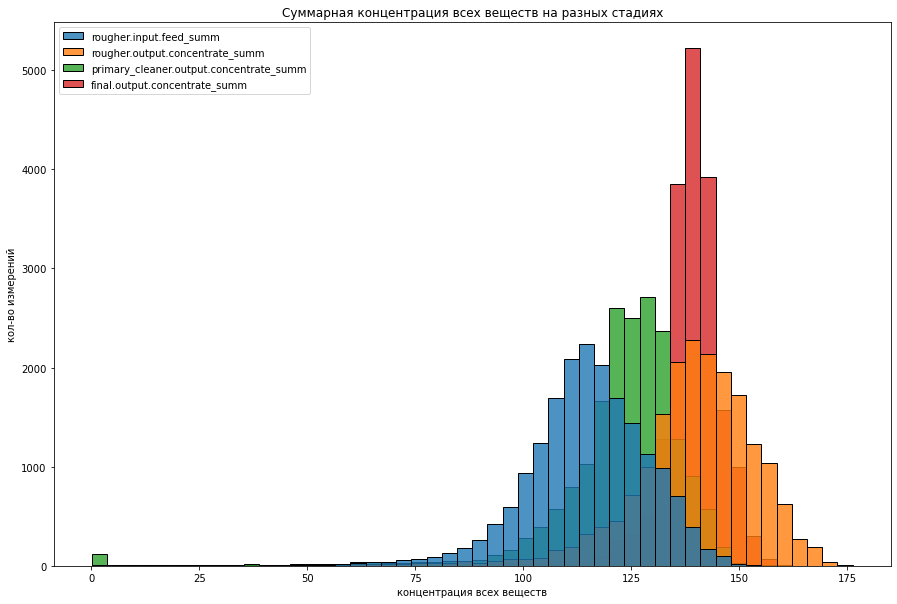

In [32]:
plt.figure(figsize = (15,10))
ax = sns.histplot(df.iloc[:,-4:], 
                      bins=50,                        
                      alpha=0.8)
plt.title('Cуммарная концентрация всех веществ на разных стадиях')
plt.xlabel("концентрация всех веществ")
plt.ylabel("кол-во измерений")
plt.show();

In [33]:
df.iloc[:,-4:].describe().T

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_summ,18842.0,114.646960,14.342356,0.08,107.055465,115.192632,123.931996,153.957895
rougher.output.concentrate_summ,18842.0,139.170805,15.519622,0.08,132.656576,140.628170,148.890477,176.280239
primary_cleaner.output.concentrate_summ,18842.0,122.153302,17.768185,0.08,118.012979,124.992743,131.275530,161.498686
final.output.concentrate_summ,18842.0,138.032961,11.042076,0.08,135.892519,139.201733,142.749181,160.421288


Как видно из гистограмм распределения нормальные

**Вывод**

- Концентрация золота постепенно увеличивается с каждым этапом очистки
- Концентрация серебра уменьшается
- Концентрация свинца практически остается на одинаковом уровне.
- Концентрация всех веществ во входящем сырье ниже, чем концентрация после финального этапа на выходе.
- Максимальная суммарная концентрация на этапе rougher.output.concentrate 176.28.
- На всех этапах есть показатели значения концентрации близкие к нулю. Взможно это техничесикй сбой, либо действительно "пустая" порода.
- Средние значения концентрации металов на всех этапах колеблятся в пределах 114-139
- Распределения гранул сырья на обеих выборках нормальные.  Для моделей машинного обучения такое распределение не повлияет негативно.
- Строки с пустым значением концетрации удалены.

## Модель

### Напишим функции для вычисления итоговой sMAPE.

In [34]:
#sMAPE(target, predict) - расчет метрики качества для предсказания модели
def sMAPE(target, predict):
    
    smape = (np.sum((abs(target - predict)) / ((abs(target) + abs(predict)) / 2))) * 100 / len(target)
    
    return smape

In [35]:
#final_sMAPE(rougher, final) - Итоговая метрика складывается из двух величин
def final_sMAPE(smape_rougher, smape_final): 
    final_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return final_smape

Cделаем scorer из нашей функции

In [36]:
sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False)

Целевые признаки у нас:
- ``rougher.output.recovery`` эффективность обогащения чернового концентрата  
- ``final.output.recovery``эффективность обогащения финального концентрата

In [37]:
print('Размер обучающей выборки до разделения', df_train.shape)
print('Размер тестовой выборки до разделения', df_test.shape)

Размер обучающей выборки до разделения (13982, 55)
Размер тестовой выборки до разделения (4860, 55)


In [38]:
def separation(data): # создадим функция для разделения данных на целевые признаки и на признаки
    features = data.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
    target_rougher = data['rougher.output.recovery']
    target_final = data['final.output.recovery']
    print('Размер  выборки с признаками', features.shape)
    print('Размер  выборки с целевым признакам чернового концентрата', target_rougher.shape)
    print('Размер  выборки с целевым признакам финального концентрата', target_final.shape)
    return features,target_rougher, target_final

In [39]:
print('Обучающая выборка после разделения')
features_train,target_rougher_train, target_final_train=separation(df_train)

Обучающая выборка после разделения
Размер  выборки с признаками (13982, 52)
Размер  выборки с целевым признакам чернового концентрата (13982,)
Размер  выборки с целевым признакам финального концентрата (13982,)


In [40]:
print('Тестовая выборка после разделения')
features_test,target_rougher_test, target_final_test=separation(df_test)

Тестовая выборка после разделения
Размер  выборки с признаками (4860, 52)
Размер  выборки с целевым признакам чернового концентрата (4860,)
Размер  выборки с целевым признакам финального концентрата (4860,)


In [41]:
features_train.describe().astype('int').T 

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_au,13982,8,1,0,6,8,9,13
rougher.input.feed_ag,13982,8,1,0,7,8,10,14
rougher.input.feed_pb,13982,3,1,0,2,3,4,7
rougher.input.feed_sol,13982,36,5,0,34,37,39,53
rougher.input.feed_rate,13982,476,106,0,416,498,549,717
rougher.input.feed_size,13982,59,23,0,47,54,64,484
rougher.input.floatbank10_sulfate,13982,12,3,0,10,12,14,36
rougher.input.floatbank10_xanthate,13982,6,1,0,5,6,6,9
rougher.state.floatbank10_a_air,13982,1103,161,0,999,1000,1208,1512
rougher.state.floatbank10_a_level,13982,-380,94,-657,-499,-300,-299,-273


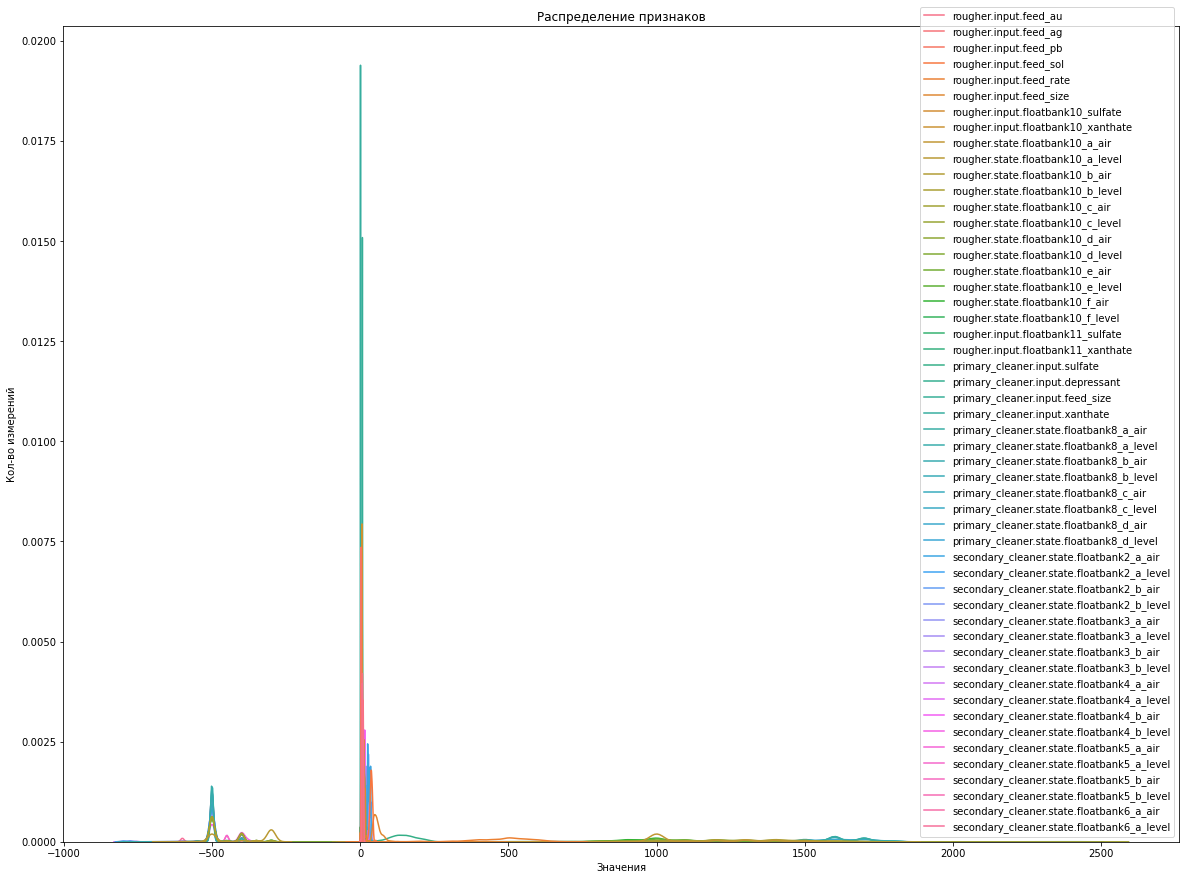

In [42]:
plt.figure(figsize = (20,15))
ax = sns.kdeplot(data=features_train,                    
                      alpha=0.8)
plt.title('Распределение признаков')
plt.xlabel("Значения")
plt.ylabel("Кол-во измерений")
plt.show();

Исходные признаки имеют разный масштаб.Стандартизируем признаки

In [43]:
scaler = StandardScaler()
scaler.fit(features_train) 

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

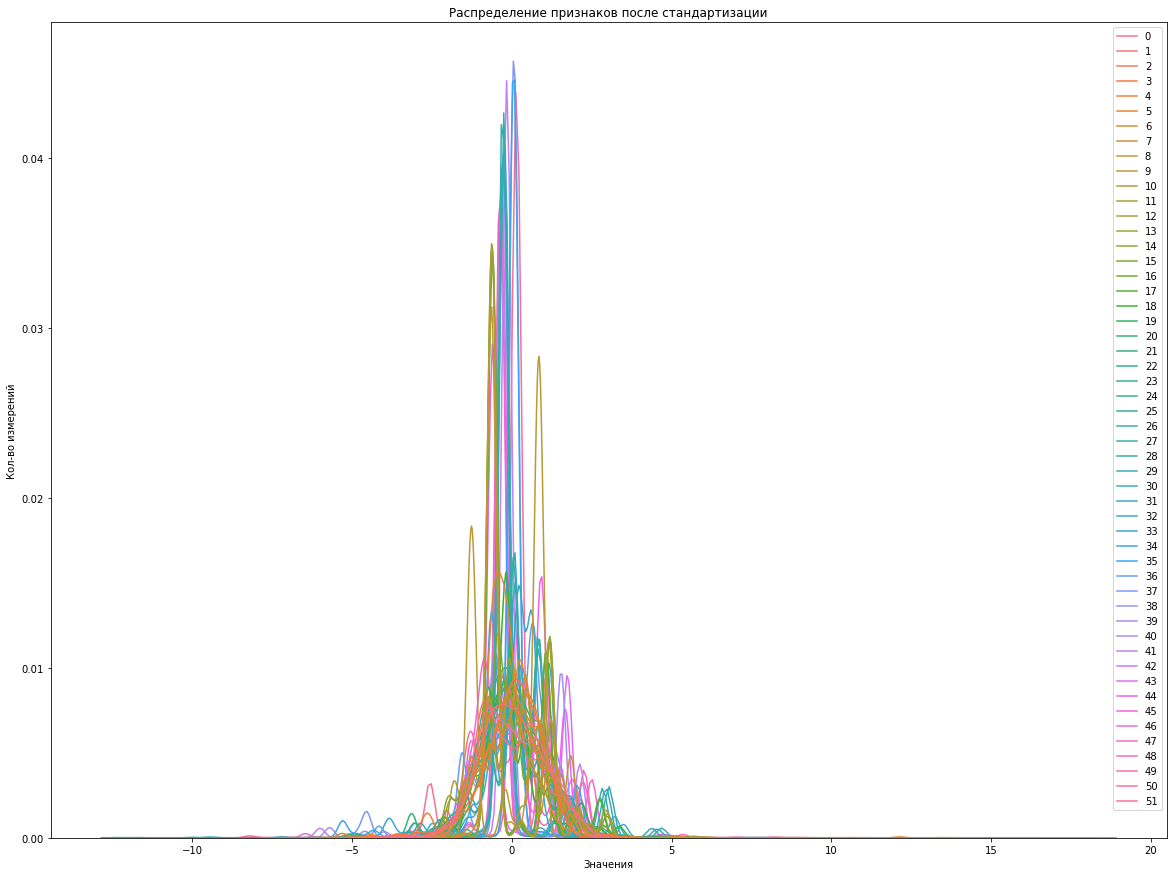

In [44]:
plt.figure(figsize = (20,15))
ax = sns.kdeplot(data=features_train,                    
                      alpha=0.8)
plt.title('Распределение признаков после стандартизации')
plt.xlabel("Значения")
plt.ylabel("Кол-во измерений")
plt.show();

### Обучение моделей

Для обучения возьмем:

- линейную регрессию
- дерево регрессии
- случайный лес регрессии

In [45]:
def model_metric(model, features, target):
    score = (-1)*cross_val_score(model, features, target,scoring=sMAPE_scorer, cv=3, n_jobs=-1)  
    
    return score.mean()

#### Линейная регрессия

In [46]:
model = LinearRegression()
score_rougher_train=model_metric(model, features_train, target_rougher_train)
print('Средняя оценка качества модели обогащения чернового концентрата:{:.4f}'.format(score_rougher_train))

Средняя оценка качества модели обогащения чернового концентрата:8.2184


In [47]:
model = LinearRegression()
score_final_train=model_metric(model,features_train, target_final_train)
print('Средняя оценка качества модели обогащения финального концентрата :{:.4f}'.format(score_final_train))

Средняя оценка качества модели обогащения финального концентрата :10.9135


In [48]:
print('Симметричное среднее абсолютное процентное отклонение :{:.4f}'
      .format(final_sMAPE(score_rougher_train, score_final_train)))

Симметричное среднее абсолютное процентное отклонение :10.2397


####  Дерево решений

In [49]:
best_tree = 0 
score_rougher = 1000

for depth in range(2, 20):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    score_rougher_train=model_metric(model, features_train, target_rougher_train)    
    print(score_rougher, score_rougher_train)
    if score_rougher > score_rougher_train:
        score_rougher = score_rougher_train
        best_tree = depth

print('depth:',best_tree)
print('Средняя оценка качества модели обогащения чернового концентрата:{:.4f}'.format(score_rougher))

1000 7.21792094013994
7.21792094013994 6.991157248748291
6.991157248748291 6.880699855466137
6.880699855466137 7.288062088926438
6.880699855466137 7.379199660502896
6.880699855466137 7.111297552235793
6.880699855466137 7.536793111416638
6.880699855466137 7.873704766182674
6.880699855466137 7.6999489654519095
6.880699855466137 7.874182313817972
6.880699855466137 7.9698667697024845
6.880699855466137 8.128553302328195
6.880699855466137 8.462528873439856
6.880699855466137 8.200091962906424
6.880699855466137 8.510552090263234
6.880699855466137 8.567323044441592
6.880699855466137 8.671196068251204
6.880699855466137 8.647839006284661
depth: 4
Средняя оценка качества модели обогащения чернового концентрата:6.8807


In [50]:
best_tree = 0 
score_final = 1000

for depth in range(2, 20):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    score_final_train=model_metric(model, features_train, target_final_train)
    if score_final > score_final_train:
        score_final = score_final_train
        best_tree = depth

print('depth:',best_tree)
print('Средняя оценка качества модели обогащения финального концентрата:{:.4f}'.format(score_final))

depth: 2
Средняя оценка качества модели обогащения финального концентрата:9.6556


In [51]:
print('Симметричное среднее абсолютное процентное отклонение :{:.4f}'
      .format(final_sMAPE(score_rougher, score_final)))

Симметричное среднее абсолютное процентное отклонение :8.9618


#### Cлучайный лес

In [52]:
depth_random = 0
n_est_random = 0
score_rougher = 1000

for depth in range(1,21,2):         
        for est in range(50, 100, 10):
            model = RandomForestRegressor(random_state=12345,
                                           max_depth=depth,                                           
                                           n_estimators=est)
            score_rougher_train=model_metric(model, features_train, target_rougher_train)
            if score_rougher > score_rougher_train:
                score_rougher = score_rougher_train
                best_random = depth
                n_est_random =est 
print('depth:',best_random)
print('n_estimators:',n_est_random)
print('Средняя оценка качества модели обогащения чернового концентрата:{:.4f}'.format(score_rougher))                

depth: 5
n_estimators: 70
Средняя оценка качества модели обогащения чернового концентрата:6.5988


In [58]:
depth_random = 0
n_est_random = 0
score_final = 1000

for depth in range(1,21,2):         
        for est in range(50, 100, 10):
            model = RandomForestRegressor(random_state=12345,
                                           max_depth=depth,                                           
                                           n_estimators=est)
            score_final_train=model_metric(model, features_train, target_final_train)
            if score_final > score_rougher_train:
                score_final = score_rougher_train
                best_random = depth
                n_est_random =est 
print('depth:',best_random)
print('n_estimators:',n_est_random)
print('Средняя оценка качества модели обогащения финального концентрата:{:.4f}'.format(score_final))   

depth: 1
n_estimators: 50
Средняя оценка качества модели обогащения финального концентрата:6.9461


In [59]:
print('Симметричное среднее абсолютное процентное отклонение :{:.4f}'
      .format(final_sMAPE(score_rougher, score_final)))

Симметричное среднее абсолютное процентное отклонение :6.8593


**Вывод**

Лучшая модель **Cлучайный лес** показала: 
- sMAPE чернового концентрата: 6.5988 
- sMAPE финального концентрата: 6.9461
- Итоговую sMAPE: 6.8593

### Проверка лучшей модели на тестовой выборке

In [63]:
model =  RandomForestRegressor(random_state=12345,
                                           max_depth=1,                                           
                                           n_estimators=50)
model_rougher_train=model.fit(features_train, target_rougher_train)
predicted_rougher = model_rougher_train.predict(features_test)

model_final_train=model.fit(features_train, target_final_train)
predicted_final = model_rougher_train.predict(features_test)

print('Средняя оценка качества модели обогащения чернового концентрата:{:.4f}'
      .format(sMAPE(target_rougher_test, predicted_rougher)))    
print('Средняя оценка качества модели обогащения финального концентрата:{:.4f}'
      .format(sMAPE(target_final_test, predicted_final)))    
print('Симметричное среднее абсолютное процентное отклонение :{:.4f}'
      .format(final_sMAPE(sMAPE(target_rougher_test, predicted_rougher),
                          sMAPE(target_final_test, predicted_final))))  

Средняя оценка качества модели обогащения чернового концентрата:5.8661
Средняя оценка качества модели обогащения финального концентрата:8.7698
Симметричное среднее абсолютное процентное отклонение :8.0438


### Проверка модели на адекватность

In [61]:
dummy = DummyRegressor(strategy="mean")

dummy_rougher=dummy.fit(features_train, target_rougher_train)
predicted_rougher_dummy = dummy_rougher.predict(features_test)

dummy_final=dummy.fit(features_train, target_final_train)
predicted_final_dummy = dummy_final.predict(features_test)

print('Средняя оценка качества модели обогащения чернового концентрата:{:.4f}'
      .format(sMAPE(target_rougher_test, predicted_rougher_dummy)))    
print('Средняя оценка качества модели обогащения финального концентрата:{:.4f}'
      .format(sMAPE(target_final_test, predicted_final_dummy)))    
print('Симметричное среднее абсолютное процентное отклонение :{:.4f}'
      .format(final_sMAPE(sMAPE(target_rougher_test, predicted_rougher_dummy),
                          sMAPE(target_final_test, predicted_final_dummy)))) 

Средняя оценка качества модели обогащения чернового концентрата:6.1075
Средняя оценка качества модели обогащения финального концентрата:9.2601
Симметричное среднее абсолютное процентное отклонение :8.4719


**Вывод**

Итоговый sMAPE модель Cлучайный лес на тестовой выборке - 8.0438 Проверка адекватности модели - sMAPE при DummyRegressor - 8,47.

метрика sMAPE для DummyRegressor больше, чем для тестовой модели, это может означать, что тестовая модель лучше предсказывает значения целевой переменной, чем DummyRegressor.  Значит такую модель можно использовать.

**ВЫВОД**

- Обучающая и тестовая выборка были предобработаны. Количество столбцов составило 55.
- Заполнены все пропуски  во всех таблицах, включая исходные данные.
- Эффективность обогащения rougher.output.recovery в обучающей выборке была рассчитана верно.
- Распределения гранул сырья на обеих выборках нормальные. 
- Строки с пустым значением концетрации были удалены.
- Лучшая модель Cлучайного леса показала:
 - sMAPE чернового концентрата: 6.5988
 - sMAPE финального концентрата: 6.9461
 - Итоговую sMAPE: 6.8593
- Модель прошла проверку на тестовой выборке с показателями:
 - sMAPE чернового концентрата: 5.8661
 - sMAPE финального концентрата: 8.7698
 - Итоговая sMAPE: 8.0438
- Проверка модели на адекватность показала:
 - sMAPE чернового концентрата: 6.1075
 - sMAPE финального концентрата: 9.2601
 - Итоговая sMAPE: 8.4719 